# Atividade 1

A atividade consiste em importar a base de dados e realizar uma análise exploratória com a finalidade de:
- Inspecionar as variáveis quanto a anomalias ou necessidade de curadoria.
- Examinar a relação entre as variáveis por meio de gráficos e medidas resumo.


In [5]:
# Imports 
import pandas
import matplotlib.pyplot as plot
from utils import read_cameras_dataset
from IPython.display import display, Markdown

cameras_dataframe = read_cameras_dataset()

## Resumo dos dados

In [6]:
colunas = cameras_dataframe.columns
display(Markdown(
    f'- Número de linhas: {len(cameras_dataframe)}\n'
    f'- Número de colunas: {len(cameras_dataframe)}\n'
))


- Número de linhas: 256
- Número de colunas: 256


In [7]:
colunas_dtypes = cameras_dataframe.dtypes
colunas_not_null = cameras_dataframe.count()
colunas_info = pandas.concat({"Tipo": colunas_dtypes, "Não Null": colunas_not_null}, axis=1)

colunas_info

,Tipo,Não Null
id,Int64,256
name,string,256
price,Float64,256
last_update,datetime64[ns],256
url,string,256
popularity,Int64,2
needs_update,Int64,256
aperture_max,Float64,250
base_name,string,256
brand,string,255


## Variável Resposta

- Preço (price)

## Possíveis variáveis preditoras

- Resolução do Sensor (sensor_resolution)
- Zoom Óptico (optical_zoom)
- Tamanho do Display (display_size)

## Correlação entre possíveis variáveis preditoras e a variável resposta


| Coluna            |   Correlação |
|:------------------|-------------:|
| sensor_resolution |     0.611263 |
| optical_zoom      |    -0.170697 |
| display_size      |     0.291625 |

<Axes: >

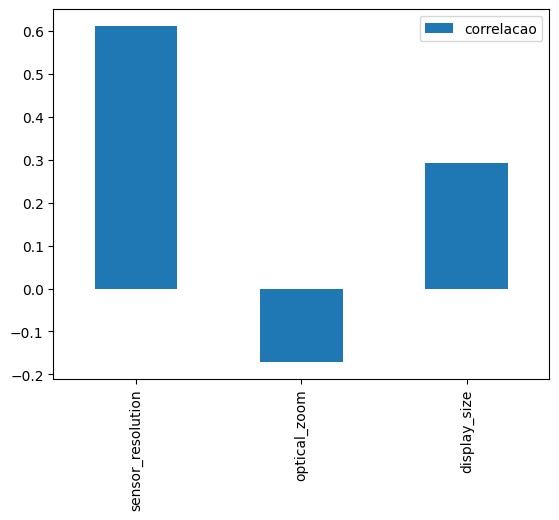

In [8]:
colunas_preditivas = ['sensor_resolution', 'optical_zoom', 'display_size']
precos = cameras_dataframe.price.astype('float64')
correlacoes = []

for coluna_preditiva in colunas_preditivas:
    coluna_preditiva_valores = cameras_dataframe[coluna_preditiva].dropna().astype('float64')
    correlacoes.append(precos.corr(coluna_preditiva_valores))

correlacoes_dataframe = pandas.DataFrame(correlacoes, columns=["correlacao"], index=colunas_preditivas)
display(Markdown(correlacoes_dataframe.to_markdown(headers= ["Coluna", "Correlação"])))
correlacoes_dataframe.plot.bar()